image.png


<h1><center><font size=10><a name='link6'>Data Science and Business Analytics</a></center></font></h1>


<h1><center> Practice Project 12 </center></h1>

<h1><center>Data Cleaning Process </center></h1>



<h1><center> By </center></h1>



<h1><center>Hayford Osumanu </center></h1>



<h1><center>March  2023 </center></h1>


image.png

# Content

##  Data Profiling

##  Data Standardization and Normalization

##  Missing Value Imputations

##  Outlier Detections and Removal

##  Summary of Data Cleaning

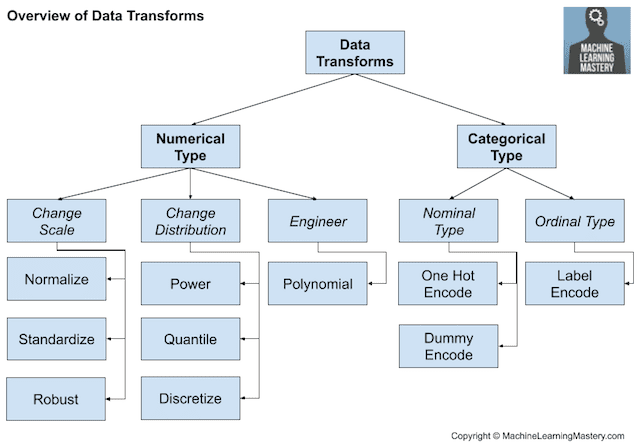

image.png

### What is data Cleaning? What is the importance of Data Cleaning? Which are the important steps of Data Cleaning?

### Data cleansing, also known as data cleaning or data scrubbing, refers to the process of identifying and correcting or removing inaccurate, incomplete, or irrelevant data from a dataset. The aim of data cleansing is to improve the quality of the data so that it can be used for analysis, modeling, and other purposes.

### The importance of data cleansing lies in the fact that poor data quality can lead to inaccurate analysis and poor decision making. Dirty data can also cause problems such as increased costs, wasted resources, and poor customer experiences. Therefore, data cleansing is essential to ensure that the data used for analysis is accurate, complete, and consistent.



### The steps involved in data cleaning may vary depending on the nature of the data and the specific goals of the analysis, but some common steps include:


### `Data profiling`: This involves analyzing the data to identify patterns, missing values, and inconsistencies.

### `Data standardization`: This involves transforming the data into a common format to ensure consistency across the dataset.

### `Data normalization`: This involves scaling the data so that it falls within a specific range, such as between 0 and 1, to make it easier to compare and analyze.

### `Data deduplication`: This involves identifying and removing duplicate records from the dataset.

### `Missing value imputation`: This involves filling in missing data values using methods such as mean imputation, regression imputation, or model-based imputation.

### `Outlier detection and removal`: This involves identifying and removing extreme values in the dataset that may be errors or may skew the analysis.

### `Data validation`: This involves checking the data for errors or inconsistencies and correcting them as necessary.

### By following these steps, data analysts can ensure that the data they are working with is accurate, complete, and consistent, which is essential for accurate analysis and decision making.

In [ ]:
!pip install impyute

In [336]:
import seaborn as sns
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

image.png

# 1.0: Types of Data Profiling

## To view the first few rows of the DataFrame:

In [99]:
import pandas as pd
df = sns.load_dataset("tips")
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## To view the last few rows of the DataFrame:

In [337]:
import pandas as pd
df = sns.load_dataset("tips")
print(df.tail())


     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


## To get the shape of the DataFrame:

In [100]:
import pandas as pd
df = sns.load_dataset("tips")
print(df.shape)

(244, 7)


## To check the data types of the columns in the DataFrame:

In [106]:
import pandas as pd
df = sns.load_dataset("tips")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
import pandas as pd
df = sns.load_dataset("tips")
df.dtypes.to_frame()


,0
total_bill,float64
tip,float64
sex,category
smoker,category
day,category
time,category
size,int64


In [108]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [117]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['total_bill', 'tip', 'size']

## To check the unique values in a column of the DataFrame:

In [119]:
import pandas as pd
df = sns.load_dataset("tips")
print(df['sex'].unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']


## To get the count of values in a column of the DataFrame:

In [128]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("category").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    # print("cat_col")

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


## Checking the Outlier detection using boxplot

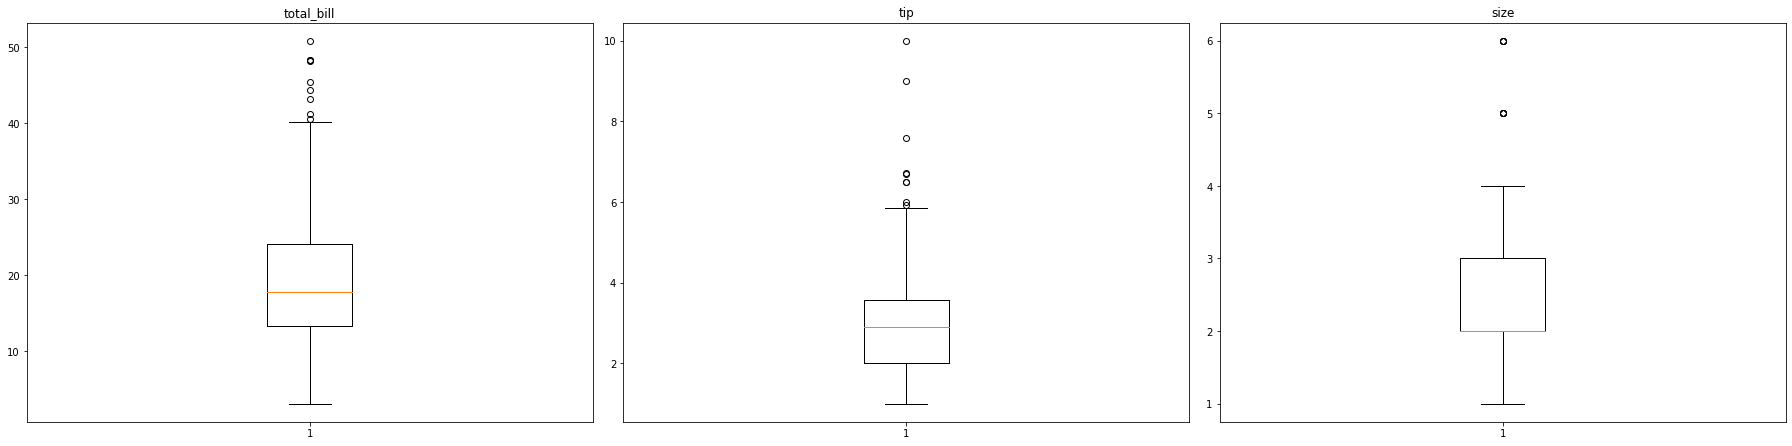

In [126]:
# outlier detection using boxplot
import numpy as np

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(25, 12))
for i, parameter in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)
    plt.boxplot(df[parameter], whis=1.5)
    plt.tight_layout()
    plt.title(parameter)

plt.show()

## To check for duplicates in the DataFrame:

In [130]:
# let's check for duplicate values in the data
df.groupby(df.duplicated(subset=None, keep="first"), as_index=False).size()

,index,size
0,False,243
1,True,1


In [129]:
import pandas as pd
df = sns.load_dataset("tips")
print(df.duplicated().sum())

1


In [131]:
# dropping duplicate entries from the data
df.drop_duplicates(inplace=True)
# resetting the index of data frame since some rows will be removed
df.reset_index(drop=True, inplace=True)

In [132]:
# let's check for duplicate values in the data again
df.groupby(df.duplicated(subset=None, keep="first"), as_index=False).size()

,index,size
0,False,243


## To get basic statistics of the DataFrame:

In [133]:
# let's view the statistical summary of numerical columns in the data, max values highlighted
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
total_bill,243.0,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,3.002387,1.385002,1.00,2.00,2.92,3.575,10.00
size,243.0,2.572016,0.952356,1.00,2.00,2.00,3.000,6.00


In [135]:
# Summarize categorical features
df.describe(include=['category'])

,sex,smoker,day,time
count,243,243,243,243
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [137]:
# Extracting the Quantiles of the dataset max highlighted
df.quantile([0.25, 0.5, 0.6, 0.75, 0.9, 0.95, 0.99]).T

,0.25,0.50,0.60,0.75,0.90,0.95,0.99
total_bill,13.38,17.81,19.872,24.175,32.29,38.064,48.228
tip,2.00,2.92,3.028,3.575,5.00,5.197,7.223
size,2.00,2.00,2.000,3.000,4.00,4.000,6.000


image.png

# 2.0: Data Standardization and Normalization

### here are 25 sample Python codes for different types of data standardization using a dataframe dataset:

In [235]:
df=pd.read_csv("UNH2.csv")
df.head()

,Open,High,Low,Close,Adj Close
0,465.850006,477.309998,465.609985,475.869995,469.852692
1,470.890015,476.959991,467.730011,476.250000,470.227905
2,478.190002,487.170013,477.890015,485.380005,479.242493
3,486.000000,491.380005,482.220001,486.589996,480.437195
4,480.690002,499.660004,477.489990,498.649994,492.344666


## Min-max scaling:

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)
df_normalized

array([[0.14484418, 0.19443618, 0.25611667, 0.23096315, 0.19764871],
       [0.19318959, 0.19094623, 0.27477559, 0.2346493 , 0.20125019],
       [0.26321345, 0.29275124, 0.3641965 , 0.32321271, 0.28777676],
       ...,
       [0.40345322, 0.35975695, 0.45907415, 0.35726072, 0.38037855],
       [0.34446047, 0.35417287, 0.43443045, 0.38442132, 0.40725424],
       [0.3724699 , 0.34599681, 0.40925895, 0.31302727, 0.3366091 ]])

## Standardization:

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)
df_standardized

array([[-2.06236986, -1.8900725 , -1.80355874, -1.67340375, -1.80539631],
       [-1.84132474, -1.90613755, -1.71099562, -1.65618359, -1.78857832],
       [-1.52116131, -1.43750564, -1.26739649, -1.24245196, -1.38452167],
       ...,
       [-0.87995633, -1.12906288, -0.7967276 , -1.08339376, -0.95209532],
       [-1.14968327, -1.15476772, -0.91898007, -0.95651067, -0.82659282],
       [-1.02161842, -1.19240401, -1.04385077, -1.29003415, -1.15648732]])

## Unit Vector Scaling:


In [257]:
def mean_normalization(x):
    return (x - x.mean()) / (x.max() - x.min())

df_normalizedv = df.apply(mean_normalization)
df_normalizedv.head()

,Open,High,Low,Close,Adj Close
0,-0.451067,-0.410597,-0.363562,-0.358209,-0.386616
1,-0.402721,-0.414087,-0.344903,-0.354523,-0.383014
2,-0.332698,-0.312282,-0.255482,-0.265959,-0.296488
3,-0.257781,-0.270304,-0.217373,-0.254222,-0.285021
4,-0.308717,-0.187743,-0.259003,-0.137237,-0.170727


## Vector Normalization:

In [258]:
def vector_normalization(x):
    return x / np.sqrt(np.sum(np.square(x)))

df_normalizedvn = df.apply(vector_normalization)
df_normalizedvn.head()

,Open,High,Low,Close,Adj Close
0,0.057390,0.058171,0.058033,0.058637,0.058196
1,0.058011,0.058129,0.058297,0.058684,0.058243
2,0.058910,0.059373,0.059563,0.059809,0.059359
3,0.059872,0.059886,0.060103,0.059958,0.059507
4,0.059218,0.060895,0.059513,0.061444,0.060982


## Mean normalization:

In [150]:
df_normalized = (df - df.mean()) / (df.max() - df.min())
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,-0.451067,-0.410597,-0.363562,-0.358209,-0.386616
1,-0.402721,-0.414087,-0.344903,-0.354523,-0.383014
2,-0.332698,-0.312282,-0.255482,-0.265959,-0.296488
3,-0.257781,-0.270304,-0.217373,-0.254222,-0.285021
4,-0.308717,-0.187743,-0.259003,-0.137237,-0.170727


In [256]:
def mean_normalization(x):
    return (x - x.mean()) / (x.max() - x.min())

df_normalizedm = df.apply(mean_normalization)
df_normalizedm.head()

,Open,High,Low,Close,Adj Close
0,-0.451067,-0.410597,-0.363562,-0.358209,-0.386616
1,-0.402721,-0.414087,-0.344903,-0.354523,-0.383014
2,-0.332698,-0.312282,-0.255482,-0.265959,-0.296488
3,-0.257781,-0.270304,-0.217373,-0.254222,-0.285021
4,-0.308717,-0.187743,-0.259003,-0.137237,-0.170727


## Decimal scaling:

In [158]:
df_normalized = df / 10**len(str(df.max()))
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [239]:
def decimal_scaling(x):
    max_val = max(abs(x))
    num_digits = len(str(int(max_val)))
    return x / (10 ** num_digits)

df_normalized = df.apply(decimal_scaling)
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,0.46585,0.47731,0.46561,0.47587,0.469853
1,0.47089,0.47696,0.46773,0.47625,0.470228
2,0.47819,0.48717,0.47789,0.48538,0.479242
3,0.48600,0.49138,0.48222,0.48659,0.480437
4,0.48069,0.49966,0.47749,0.49865,0.492345


## Z-score normalization:

In [160]:
df_normalized = (df - df.mean()) / df.std()
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,-2.058241,-1.886289,-1.799948,-1.670054,-1.801782
1,-1.837638,-1.902321,-1.707570,-1.652868,-1.784998
2,-1.518116,-1.434628,-1.264859,-1.239965,-1.381750
3,-1.176270,-1.241779,-1.076185,-1.185243,-1.328307
4,-1.408690,-0.862495,-1.282290,-0.639831,-0.795653


In [237]:
from scipy.stats import zscore
df_normalized = df.apply(zscore)
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,-2.062370,-1.890073,-1.803559,-1.673404,-1.805396
1,-1.841325,-1.906138,-1.710996,-1.656184,-1.788578
2,-1.521161,-1.437506,-1.267396,-1.242452,-1.384522
3,-1.178630,-1.244270,-1.078344,-1.187620,-1.330972
4,-1.411516,-0.864225,-1.284862,-0.641114,-0.797249


## Log transformation:


In [163]:
import numpy as np
df_log = np.log(df)
df_log.head()

,Open,High,Low,Close,Adj Close
0,6.143864,6.168166,6.143348,6.165145,6.152419
1,6.154625,6.167433,6.147891,6.165943,6.153217
2,6.170008,6.188613,6.169381,6.184932,6.172207
3,6.186209,6.197218,6.178400,6.187422,6.174697
4,6.175223,6.213928,6.168543,6.211904,6.199179


## Box-Cox transformation:

In [ ]:
from scipy import stats
df_boxcox = stats.boxcox(df["Open"])
df_boxcox

In [242]:
from scipy.stats import boxcox
df_normalized = df.apply(lambda x: boxcox(x+1)[0])
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,3.264010e+09,3.732165e+09,8.009191e+09,7.487866e+08,4.273961e+08
1,3.399245e+09,3.721831e+09,8.153287e+09,7.508874e+08,4.285652e+08
2,3.602369e+09,4.032064e+09,8.870858e+09,8.026401e+08,4.573391e+08
3,3.829421e+09,4.165370e+09,9.190565e+09,8.096852e+08,4.612525e+08
4,3.673940e+09,4.436976e+09,8.841746e+09,8.823440e+08,5.015635e+08


## Square root transformation:

In [169]:
df_sqrt = np.sqrt(df)
df_sqrt.head()


,Open,High,Low,Close,Adj Close
0,21.583559,21.847425,21.577998,21.814445,21.676086
1,21.700000,21.839414,21.627067,21.823153,21.684739
2,21.867556,22.071928,21.860696,22.031341,21.891608
3,22.045408,22.167093,21.959508,22.058785,21.918878
4,21.924644,22.353076,21.851544,22.330472,22.188841


## Cube root transformation:

In [171]:
df_cbrt = np.cbrt(df)
df_cbrt.head()

,Open,High,Low,Close,Adj Close
0,7.752029,7.815081,7.750697,7.807214,7.774168
1,7.779885,7.813171,7.762443,7.809292,7.776237
2,7.819881,7.868528,7.818246,7.858879,7.825614
3,7.862224,7.891129,7.841788,7.865404,7.832112
4,7.833485,7.935206,7.816064,7.929855,7.896290


## Power transformation:


In [173]:
df_pow = np.power(df, 2)
df_pow.head()

,Open,High,Low,Close,Adj Close
0,217016.228090,227824.834191,216792.658132,226452.252141,220761.552180
1,221737.406227,227490.833015,218771.363190,226814.062500,221114.282641
2,228665.678013,237334.621566,228378.866437,235593.749254,229673.367097
3,236196.000000,241454.309314,232536.129364,236769.824207,230819.898339
4,231062.878023,249660.119597,227996.690550,248651.816516,242403.270139


In [261]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
df_normalizedp = transformer.fit_transform(df)
df_normalizedp

array([[-1.8948505 , -1.76515531, -1.68548908, -1.59410735, -1.70526994],
       [-1.72122776, -1.77802068, -1.61194536, -1.57970474, -1.69136911],
       [-1.46044466, -1.39180279, -1.24570948, -1.22489948, -1.34923647],
       ...,
       [-0.90392375, -1.12500356, -0.83139016, -1.08395347, -0.96538834],
       [-1.14370163, -1.14762766, -0.941616  , -0.96968083, -0.85048639],
       [-1.03089802, -1.18062455, -1.05229901, -1.26656911, -1.14913099]])

## Yeo-Johnson transformation:

In [175]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_normalized = scaler.fit_transform(df)
df_normalized

array([[-1.8948505 , -1.76515531, -1.68548908, -1.59410735, -1.70526994],
       [-1.72122776, -1.77802068, -1.61194536, -1.57970474, -1.69136911],
       [-1.46044466, -1.39180279, -1.24570948, -1.22489948, -1.34923647],
       ...,
       [-0.90392375, -1.12500356, -0.83139016, -1.08395347, -0.96538834],
       [-1.14370163, -1.14762766, -0.941616  , -0.96968083, -0.85048639],
       [-1.03089802, -1.18062455, -1.05229901, -1.26656911, -1.14913099]])

## Quantile normalization:

In [176]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
df_normalized = scaler.fit_transform(df)
df_normalized

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn(


array([[-2.05209282, -2.05209282, -1.8503923 , -1.74882494, -1.90928839],
       [-1.90928839, -2.14280806, -1.74882494, -1.66263489, -1.8503923 ],
       [-1.55275395, -1.45895202, -1.25677439, -1.3263042 , -1.45895202],
       ...,
       [-0.7161551 , -1.02530164, -0.5914531 , -0.97548998, -0.82452986],
       [-1.1145105 , -1.1145105 , -0.83875568, -0.78281639, -0.70320547],
       [-0.89745174, -1.17258104, -1.05997356, -1.43037144, -1.15279148]])

In [264]:
from sklearn.preprocessing import QuantileTransformer
transformer = QuantileTransformer()
df_normalizedq = transformer.fit_transform(df)
df_normalizedq

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (250). n_quantiles is set to n_samples.
  warnings.warn(


array([[0.02008032, 0.02008032, 0.03212851, 0.04016064, 0.02811245],
       [0.02811245, 0.01606426, 0.04016064, 0.04819277, 0.03212851],
       [0.06024096, 0.07228916, 0.10441767, 0.09236948, 0.07228916],
       ...,
       [0.23694779, 0.15261044, 0.27710843, 0.16465863, 0.20481928],
       [0.13253012, 0.13253012, 0.20080321, 0.21686747, 0.24096386],
       [0.18473896, 0.12048193, 0.14457831, 0.07630522, 0.12449799]])

## Robust scaling:

In [177]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_normalized = scaler.fit_transform(df)
df_normalized

array([[-1.25454822, -1.17828821, -1.11625048, -0.99484046, -1.13119529],
       [-1.12541649, -1.18785908, -1.06252791, -0.98491283, -1.12114055],
       [-0.93838114, -0.90866806, -0.8050681 , -0.74639144, -0.87957294],
       ...,
       [-0.56379743, -0.72491093, -0.53189732, -0.65469243, -0.62104434],
       [-0.72136844, -0.74022479, -0.60285124, -0.58154277, -0.54601195],
       [-0.6465546 , -0.7626469 , -0.67532475, -0.77382316, -0.74324128]])

## Range normalization:

In [179]:
df_normalized = (df - df.min()) / (df.max() - df.min())
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,0.144844,0.194436,0.256117,0.230963,0.197649
1,0.193190,0.190946,0.274776,0.234649,0.201250
2,0.263213,0.292751,0.364197,0.323213,0.287777
3,0.338129,0.334729,0.402306,0.334950,0.299244
4,0.287194,0.417290,0.360676,0.451935,0.413538


In [254]:
def range_scaling(x):
    data_range = x.max() - x.min()
    return (x - x.min()) / data_range

df_normalizedr = df.apply(range_scaling)
df_normalizedr.head()

,Open,High,Low,Close,Adj Close
0,0.144844,0.194436,0.256117,0.230963,0.197649
1,0.193190,0.190946,0.274776,0.234649,0.201250
2,0.263213,0.292751,0.364197,0.323213,0.287777
3,0.338129,0.334729,0.402306,0.334950,0.299244
4,0.287194,0.417290,0.360676,0.451935,0.413538


## Sigmoid Scaling:

In [248]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

df_normalized = df.apply(sigmoid)
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


## Tanh Scaling:

In [250]:
import numpy as np
def tanh(x):
    return np.tanh(x)

df_normalizedt = df.apply(tanh)
df_normalizedt.head()

,Open,High,Low,Close,Adj Close
0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


## Standard Deviation Scaling:


In [251]:
def std_deviation_scaling(x):
    std_dev = x.std()
    return (x - x.mean()) / std_dev

df_normalizeds = df.apply(std_deviation_scaling)
df_normalizeds.head()

,Open,High,Low,Close,Adj Close
0,-2.058241,-1.886289,-1.799948,-1.670054,-1.801782
1,-1.837638,-1.902321,-1.707570,-1.652868,-1.784998
2,-1.518116,-1.434628,-1.264859,-1.239965,-1.381750
3,-1.176270,-1.241779,-1.076185,-1.185243,-1.328307
4,-1.408690,-0.862495,-1.282290,-0.639831,-0.795653


## Softmax Scaling:

In [247]:
import numpy as np
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

df_normalized = df.apply(softmax)
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,8.044683e-40,6.722609e-36,1.939303e-37,3.235528e-35,4.327972e-37
1,1.242674e-37,4.737309e-36,1.615702e-36,4.731286e-35,6.298504e-37
2,1.839506e-34,1.287324e-31,4.176330e-32,4.366063e-31,5.178729e-33
3,4.534612e-31,8.670902e-30,3.171640e-30,1.464139e-30,1.710313e-32
4,2.240977e-33,3.419969e-26,2.799408e-32,2.530306e-25,2.537609e-27


## Interquartile range scaling:

In [243]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_normalized = (df - Q1) / IQR
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,-0.705611,-0.614643,-0.565664,-0.458820,-0.601160
1,-0.576479,-0.624214,-0.511942,-0.448893,-0.591105
2,-0.389444,-0.345023,-0.254482,-0.210371,-0.349537
3,-0.189342,-0.229901,-0.144758,-0.178760,-0.317522
4,-0.325391,-0.003487,-0.264619,0.136307,0.001567


In [244]:
def iqr_normalization(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    return (x - q1) / iqr

df_normalized = df.apply(iqr_normalization)
df_normalized.head()

,Open,High,Low,Close,Adj Close
0,-0.705611,-0.614643,-0.565664,-0.458820,-0.601160
1,-0.576479,-0.624214,-0.511942,-0.448893,-0.591105
2,-0.389444,-0.345023,-0.254482,-0.210371,-0.349537
3,-0.189342,-0.229901,-0.144758,-0.178760,-0.317522
4,-0.325391,-0.003487,-0.264619,0.136307,0.001567


## Binning:

In [195]:
df['bin'] = pd.cut(df['Open'], bins=3, labels=['Low', 'Medium', 'High'])
df['bin']

0         Low
1         Low
2         Low
3      Medium
4         Low
        ...  
245    Medium
246    Medium
247    Medium
248    Medium
249    Medium
Name: bin, Length: 250, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

## One-hot encoding:

In [196]:
df1 = sns.load_dataset("tips")
print(df1.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [189]:
df_encoded = pd.get_dummies(df1, columns=['sex','smoker','day','time'])
df_encoded

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


## Label encoding:

In [204]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df1.copy()
df_encoded['sex']= le.fit_transform(df_encoded['sex'])
df_encoded['sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64

## Binary encoding:

In [ ]:
!pip install category_encoders

In [213]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['smoker','sex','day','time'])
df_encoded = encoder.fit_transform(df1)
df_encoded

,total_bill,tip,sex_0,sex_1,smoker_0,smoker_1,day_0,day_1,day_2,time_0,time_1,size
0,16.99,1.01,0,1,0,1,0,0,1,0,1,2
1,10.34,1.66,1,0,0,1,0,0,1,0,1,3
2,21.01,3.50,1,0,0,1,0,0,1,0,1,3
3,23.68,3.31,1,0,0,1,0,0,1,0,1,2
4,24.59,3.61,0,1,0,1,0,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,0,1,0,1,0,0,1,3
240,27.18,2.00,0,1,1,0,0,1,0,0,1,2
241,22.67,2.00,1,0,1,0,0,1,0,0,1,2
242,17.82,1.75,1,0,0,1,0,1,0,0,1,2


## Backward difference encoding:

In [218]:
encoder = ce.BackwardDifferenceEncoder(cols=['sex','smoker','day','time'])
df_encoded = encoder.fit_transform(df1)
df_encoded.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,total_bill,tip,sex_0,smoker_0,day_0,day_1,day_2,time_0,size
0,1,16.99,1.01,-0.5,-0.5,-0.75,-0.5,-0.25,-0.5,2
1,1,10.34,1.66,0.5,-0.5,-0.75,-0.5,-0.25,-0.5,3
2,1,21.01,3.50,0.5,-0.5,-0.75,-0.5,-0.25,-0.5,3
3,1,23.68,3.31,0.5,-0.5,-0.75,-0.5,-0.25,-0.5,2
4,1,24.59,3.61,-0.5,-0.5,-0.75,-0.5,-0.25,-0.5,4


## Helmert encoding:

In [221]:
encoder = ce.HelmertEncoder(cols=['sex','smoker','day','time'])
df_encoded = encoder.fit_transform(df1)
df_encoded.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,total_bill,tip,sex_0,smoker_0,day_0,day_1,day_2,time_0,size
0,1,16.99,1.01,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
1,1,10.34,1.66,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
2,1,21.01,3.50,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3
3,1,23.68,3.31,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2
4,1,24.59,3.61,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4


## Polynomial encoding:

In [224]:
encoder = ce.PolynomialEncoder(cols=['sex','smoker','day','time'])
df_encoded = encoder.fit_transform(df1)
df_encoded.head()

/usr/local/lib/python3.8/dist-packages/category_encoders/base_contrast_encoder.py:126: FutureWarning: Intercept column might not be added anymore in future releases (c.f. issue #370)
  warnings.warn("Intercept column might not be added anymore in future releases (c.f. issue #370)",


,intercept,total_bill,tip,sex_0,smoker_0,day_0,day_1,day_2,time_0,size
0,1,16.99,1.01,-0.707107,-0.707107,-0.67082,0.5,-0.223607,-0.707107,2
1,1,10.34,1.66,0.707107,-0.707107,-0.67082,0.5,-0.223607,-0.707107,3
2,1,21.01,3.50,0.707107,-0.707107,-0.67082,0.5,-0.223607,-0.707107,3
3,1,23.68,3.31,0.707107,-0.707107,-0.67082,0.5,-0.223607,-0.707107,2
4,1,24.59,3.61,-0.707107,-0.707107,-0.67082,0.5,-0.223607,-0.707107,4


## Leave-one-out encoding:

In [231]:
target=df1['total_bill']
encoder = ce.LeaveOneOutEncoder(cols=['sex','smoker','day','time'])
df_encoded = encoder.fit_transform(df1, target)
df_encoded.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,18.069302,19.202933,21.468933,20.818914,2
1,10.34,1.66,20.810769,19.247267,21.557600,20.856914,3
2,21.01,3.50,20.742372,19.176133,21.415333,20.795943,3
3,23.68,3.31,20.725256,19.158333,21.379733,20.780686,2
4,24.59,3.61,17.980930,19.152267,21.367600,20.775486,4


## Target encoding:

In [233]:
target=df1['total_bill']
encoder = ce.TargetEncoder(cols=['sex','smoker','day','time'])
df_encoded = encoder.fit_transform(df1, target)
df_encoded.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,18.059022,19.188279,21.404017,20.797159,2
1,10.34,1.66,20.744075,19.188279,21.404017,20.797159,3
2,21.01,3.50,20.744075,19.188279,21.404017,20.797159,3
3,23.68,3.31,20.744075,19.188279,21.404017,20.797159,2
4,24.59,3.61,18.059022,19.188279,21.404017,20.797159,4


image.png

# 3.0: Missing Values Imputation Methods

## Mean Imputaions

In [29]:
import pandas as pd
import numpy as np

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
df.head()

,A,B
0,1.0,6.0
1,2.0,7.0
2,NaN,8.0
3,4.0,NaN
4,5.0,10.0


In [2]:
# Mean imputation for missing values in column A
df['A'] = df['A'].fillna(df['A'].mean())

# Mean imputation for missing values in column B
df['B'] = df['B'].fillna(df['B'].mean())

print(df)

     A      B
0  1.0   6.00
1  2.0   7.00
2  3.0   8.00
3  4.0   7.75
4  5.0  10.00


In [30]:
# Mean imputation for column A
df['A'].fillna(df['A'].mean(), inplace=True)

# Mean imputation for column B
df['B'].fillna(df['B'].mean(), inplace=True)

print(df)


     A      B
0  1.0   6.00
1  2.0   7.00
2  3.0   8.00
3  4.0   7.75
4  5.0  10.00


## Median Imputation:

In [31]:
import pandas as pd
import numpy as np

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [4]:
# Median imputation for missing values in column A
df['A'] = df['A'].fillna(df['A'].median())

# Median imputation for missing values in column B
df['B'] = df['B'].fillna(df['B'].median())

print(df)

     A     B
0  1.0   6.0
1  2.0   7.0
2  3.0   8.0
3  4.0   7.5
4  5.0  10.0


In [32]:
# Median imputation for column A
df['A'].fillna(df['A'].median(), inplace=True)

# Median imputation for column B
df['B'].fillna(df['B'].median(), inplace=True)

print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  3.0   8.0
3  4.0   7.5
4  5.0  10.0


## Mode Imputation:

In [33]:
import pandas as pd
import numpy as np

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)

     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [6]:
# Mode imputation for missing values in column A
df['A'] = df['A'].fillna(df['A'].mode()[0])

# Mode imputation for missing values in column B
df['B'] = df['B'].fillna(df['B'].mode()[0])

print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  1.0   8.0
3  4.0   6.0
4  5.0  10.0


In [34]:
# Mode imputation for column A
df['A'].fillna(df['A'].mode()[0], inplace=True)

# Mode imputation for column B
df['B'].fillna(df['B'].mode()[0], inplace=True)

print(df)

     A     B
0  1.0   6.0
1  2.0   7.0
2  1.0   8.0
3  4.0   6.0
4  5.0  10.0


## K-Nearest Neighbors (KNN) Imputation:

In [35]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [8]:
# KNN imputation for missing values in columns A and B
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print(df_imputed)


     A     B
0  1.0   6.0
1  2.0   7.0
2  1.5   8.0
3  4.0   8.5
4  5.0  10.0


In [36]:
from sklearn.impute import KNNImputer

# K-nearest neighbors imputation for all columns
imputer = KNNImputer(n_neighbors=2)
df_imputed = pd.DataFrame(imputer.fit_transform(df))

print(df_imputed)


     0     1
0  1.0   6.0
1  2.0   7.0
2  1.5   8.0
3  4.0   8.5
4  5.0  10.0


## Forward Fill Imputation:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [9]:
# Forward fill imputation for column A
df['A'].fillna(method='ffill', inplace=True)

# Forward fill imputation for column B
df['B'].fillna(method='ffill', inplace=True)

print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  2.0   8.0
3  4.0   8.0
4  5.0  10.0


## Backward Fill Imputation:

In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [11]:
# Backward fill imputation for column A
df['A'].fillna(method='bfill', inplace=True)

# Backward fill imputation for column B
df['B'].fillna(method='bfill', inplace=True)

print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  4.0   8.0
3  4.0  10.0
4  5.0  10.0


## Multiple Imputation:

In [14]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Multiple imputation for all columns
imputer = IterativeImputer(max_iter=10, random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df))

print(df_imputed)


          0          1
0  1.000000   6.000000
1  2.000000   7.000000
2  3.000127   8.000000
3  4.000000   8.999964
4  5.000000  10.000000


## Hot deck imputation:

In [47]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [48]:
# Hot deck imputation for column A
df['A'].fillna(method='ffill', inplace=True)
df['A'].fillna(method='bfill', inplace=True)

# Hot deck imputation for column B
df['B'].fillna(method='ffill', inplace=True)
df['B'].fillna(method='bfill', inplace=True)

print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  2.0   8.0
3  4.0   8.0
4  5.0  10.0


## Expectation-maximization (EM) imputation:

In [49]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [50]:
from impyute.imputation.cs import em

# EM imputation for all columns
df_imputed = pd.DataFrame(em(df.values))

print(df_imputed)


          0          1
0  1.000000   6.000000
1  2.000000   7.000000
2  3.879093   8.000000
3  4.000000   6.896169
4  5.000000  10.000000


## Multivariate Imputation by Chained Equations (MICE):

In [55]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [56]:
# create MICE imputer and fit to data
mice_imputer = IterativeImputer()
mice_imputed = mice_imputer.fit_transform(df)

# convert imputed data back to dataframe
df_imputed = pd.DataFrame(mice_imputed, columns=df.columns)

# display imputed dataframe
print(df_imputed)

          A          B
0  1.000000   6.000000
1  2.000000   7.000000
2  3.000127   8.000000
3  4.000000   8.999964
4  5.000000  10.000000


In [ ]:
!pip install fancyimpute

In [53]:
import pandas as pd
from fancyimpute import IterativeImputer

# create a sample dataframe with missing values
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, None],
    'C': [None, 4, 5, None, 1],
    'D': [1, None, 2, None, 5]
})
print(df)


   A    B    C    D
0  1  5.0  NaN  1.0
1  2  4.0  4.0  NaN
2  3  3.0  5.0  2.0
3  4  2.0  NaN  NaN
4  5  NaN  1.0  5.0


In [54]:
# create MICE imputer and fit to data
mice_imputer = IterativeImputer()
mice_imputed = mice_imputer.fit_transform(df)

# convert imputed data back to dataframe
df_imputed = pd.DataFrame(mice_imputed, columns=df.columns)

# display imputed dataframe
print(df_imputed)

     A         B         C         D
0  1.0  5.000000  6.230761  1.000000
1  2.0  4.000000  4.000000  2.666655
2  3.0  3.000000  5.000000  2.000000
3  4.0  2.000000  4.153836  2.666682
4  5.0  0.999999  1.000000  5.000000


## Impute missing values with mean of column:

In [77]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
                   'B': [5, np.nan, 7, 8],
                   'C': [np.nan, 10, 11, 12]})

# Impute missing values with mean of the column
df = df.fillna(df.mean())
df


,A,B,C
0,1.000000,5.000000,11.0
1,2.000000,6.666667,10.0
2,2.333333,7.000000,11.0
3,4.000000,8.000000,12.0


##  Impute missing values with the last valid observation:


#### this method make use of the last fill method

In [78]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
                   'B': [5, np.nan, 7, 8],
                   'C': [np.nan, 10, 11, 12]})

# Impute missing values with the last valid observation
df = df.fillna(method='ffill')
df

,A,B,C
0,1.0,5.0,NaN
1,2.0,5.0,10.0
2,2.0,7.0,11.0
3,4.0,8.0,12.0


## Impute missing values with the next valid observation:

In [79]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
                   'B': [5, np.nan, 7, 8],
                   'C': [np.nan, 10, 11, 12]})

# Impute missing values with the next valid observation
df = df.fillna(method='bfill')
df

,A,B,C
0,1.0,5.0,10.0
1,2.0,7.0,10.0
2,4.0,7.0,11.0
3,4.0,8.0,12.0


## Linear interpolation imputation:

In [86]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, 5],
                   'B': [6, 7, 8, np.nan, 10]})
print(df)


     A     B
0  1.0   6.0
1  2.0   7.0
2  NaN   8.0
3  4.0   NaN
4  5.0  10.0


In [87]:
# Linear interpolation imputation for column A
df['A'].interpolate(method='linear', inplace=True)

# Linear interpolation imputation for column B
df['B'].interpolate(method='linear', inplace=True)

print(df)

     A     B
0  1.0   6.0
1  2.0   7.0
2  3.0   8.0
3  4.0   9.0
4  5.0  10.0


In [82]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4],
                   'B': [5, np.nan, 7, 8],
                   'C': [np.nan, 10, 11, 12]})
df

,A,B,C
0,1.0,5.0,NaN
1,2.0,NaN,10.0
2,NaN,7.0,11.0
3,4.0,8.0,12.0


In [85]:
# Impute missing values using interpolation
df = df.interpolate()
df

,A,B,C
0,1.0,5.0,NaN
1,2.0,6.0,10.0
2,3.0,7.0,11.0
3,4.0,8.0,12.0


## Time-based interpolation:

In [91]:
import pandas as pd

# Create a DataFrame with missing values and a DatetimeIndex
date_rng = pd.date_range(start='1/1/2022', end='1/08/2022', freq='D')
df = pd.DataFrame(date_rng, columns=['date'])
df['A'] = np.random.randint(0,100,size=(len(date_rng)))
df.loc[2:5, 'A'] = np.nan

# Time-based interpolation
df = df.set_index('date')
df = df.interpolate(method='time')
df

,A
date,
2022-01-01,2.0
2022-01-02,70.0
2022-01-03,72.0
2022-01-04,74.0
2022-01-05,76.0
2022-01-06,78.0
2022-01-07,80.0
2022-01-08,8.0


## Polynomial interpolation:

In [92]:
import pandas as pd
import numpy as np

# Create a DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, np.nan, 6, np.nan, 8]})

# Polynomial interpolation of degree 2
df['A'] = df['A'].interpolate(method='polynomial', order=2)
df

,A
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0


## Nearest neighbor interpolation:

In [94]:
import pandas as pd

# Create a DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, np.nan, 6, np.nan, 8]})

# Nearest neighbor interpolation
df['A'] = df['A'].interpolate(method='nearest')
df

,A
0,1.0
1,2.0
2,2.0
3,4.0
4,4.0
5,6.0
6,6.0
7,8.0


## Spline interpolation:

In [96]:
import pandas as pd
from scipy.interpolate import UnivariateSpline

# Create a DataFrame with missing values
df = pd.DataFrame({'A': [1, 2, np.nan, 4, np.nan, 6, np.nan, 8]})

# Spline interpolation
spline = UnivariateSpline(df.index, df['A'], k=2)
df['A'] = spline(df.index)
df

,A
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN


image.png

# 4.0: Types of outlier detection

#### Python codes for different types of outlier detection and removal techniques using a DataFrame dataset:

In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')

q1, q3 = df.quantile([0.25, 0.75])
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df_outlier_removed = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


## Z-score method for univariate outlier detection:

<AxesSubplot:>

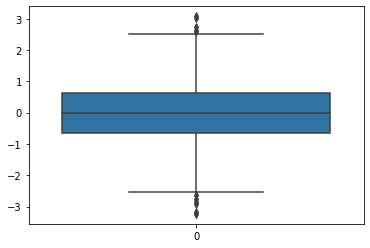

In [285]:
from scipy import stats
import numpy as np

# Generate some data
data = np.random.normal(size=1000)

# Calculate the z-scores
z_scores = np.abs(stats.zscore(data))

# Define a threshold for outliers
threshold = 3

# Identify the outliers
outliers = np.where(z_scores > threshold)[0]
sns.boxplot(data=data)

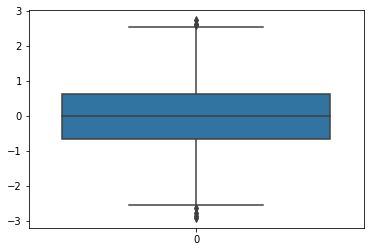

In [287]:
# Remove the outliers
clean_data = data[~np.isin(np.arange(len(data)), outliers)]
sns.boxplot(data=clean_data);

## Box plot method for detecting outliers:

In [ ]:
import seaborn as sns

def detect_outliers_boxplot(data):
    ax = sns.boxplot(x=data)
    outliers = []
    for line in ax.lines:
        if line.get_linestyle() == '--':
            outliers.extend(line.get_ydata())
    return outliers


array([23820, 23821, 23822, ..., 27747, 27748, 27749])

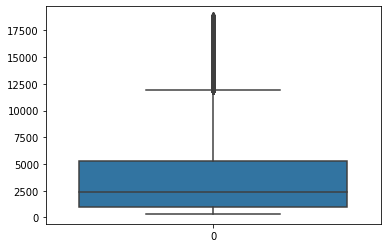

In [277]:
import seaborn as sns

# Generate some data
data = sns.load_dataset("diamonds")["price"].values

# Create a box plot to visualize the data
sns.boxplot(data=data)

# Define a threshold for outliers
threshold = 1.5

# Calculate the interquartile range
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

# Identify the outliers
outliers = np.where((data < q1 - threshold*iqr) | (data > q3 + threshold*iqr))[0]
outliers

<AxesSubplot:>

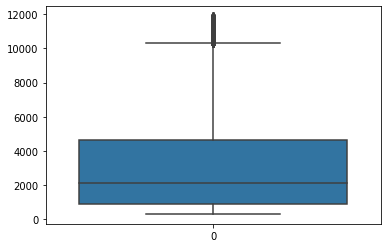

In [279]:
# Remove the outliers
clean_data = data[~np.isin(np.arange(len(data)), outliers)]
# Create a box plot to visualize the data
sns.boxplot(data=clean_data)


## Isolation Forest method for detecting outliers:

<AxesSubplot:>

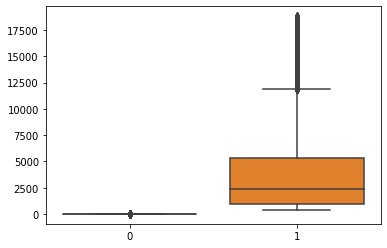

In [283]:
from sklearn.ensemble import IsolationForest

# Generate some data
data = sns.load_dataset("diamonds")[["carat", "price"]].values

# Fit the isolation forest model
model = IsolationForest(n_estimators=100, contamination=0.05)
model.fit(data)

# Identify the outliers
outliers = np.where(model.predict(data) == -1)[0]
sns.boxplot(data=data)

<AxesSubplot:>

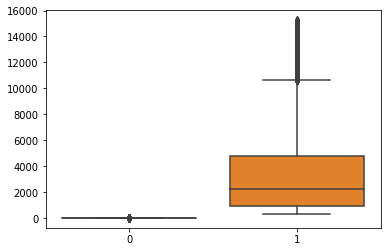

In [284]:
# Remove the outliers
clean_data = data[~np.isin(np.arange(len(data)), outliers)]
sns.boxplot(data=clean_data)

## Local Outlier Factor method for detecting outliers:

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

def detect_outliers_lof(data, n_neighbors, contamination):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    return np.where(lof.fit_predict(data) == -1)


<AxesSubplot:>

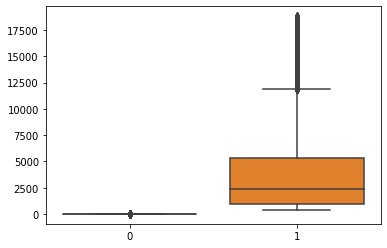

In [311]:
from sklearn.neighbors import LocalOutlierFactor

# Generate some data
data = sns.load_dataset("diamonds")[["carat", "price"]].values

# Fit the local outlier factor model
model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
model.fit(data)

# Identify the outliers
#outliers = np.where(model.predict(data) == -1)[0]

sns.boxplot(data=data)

<AxesSubplot:>

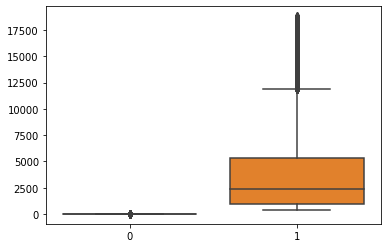

In [296]:
# Remove the outliers
clean_data1 = data[~np.isin(np.arange(len(data)), outliers)]
sns.boxplot(data=clean_data1)

## Robust Random Cut Forest method for detecting outliers:

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.rrcf import RRCF

# Generate some data
data = sns.load_dataset("diamonds")[["carat", "price"]].values

# Fit the robust random cut forest model
model = RRCF(n_trees=100, tree_size=256, sample_size=128, random_state=42)
model.fit(data)

# Identify the outliers
outliers = np.where(model.predict(data) == 1)[0]
outliers

In [ ]:
# Remove the outliers
clean_data = data[~np.isin(np.arange(len(data)), outliers)]


## Mahalanobis Distance method for detecting outliers:

In [ ]:
from scipy.spatial.distance import mahalanobis

# Generate some data
data = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.5], [0.5, 1]], size=1000)

# Calculate the Mahalanobis distances
covariance_matrix = np.cov(data.T)
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
means = np.mean(data, axis=0)
mahalanobis_distances =


In [ ]:
from scipy import stats
import numpy as np

df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'B': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]})

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
print(new_df)


    A   B
0   1   2
1   2   4
2   3   6
3   4   8
4   5  10
5   6  12
6   7  14
7   8  16
8   9  18
9  10  20


In [308]:
from scipy import stats
import numpy as np

def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    return np.where(z_scores > threshold)


In [ ]:
import seaborn as sns

def detect_outliers_boxplot(df, column):
    sns.boxplot(x=df[column])

### This code will remove any row in the dataframe that has at least one outlier value. You can modify the code to remove columns with outliers as well.

## Z-score method:

In [ ]:
import numpy as np

def z_score_outliers(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    return np.abs(z_scores) > threshold


In [ ]:
import numpy as np
from scipy import stats

def detect_outliers_zscore(data, threshold):
    zscore = np.abs(stats.zscore(data))
    return np.where(zscore > threshold)


In [317]:
from scipy import stats
import numpy as np

data = np.array([2, 2, 2, 3, 3, 3, 4, 4, 4, 1000])
data

array([   2,    2,    2,    3,    3,    3,    4,    4,    4, 1000])

In [318]:
from scipy import stats
import numpy as np

data = np.array([2, 2, 2, 3, 3, 3, 4, 4, 4, 1000])

z_scores = np.abs(stats.zscore(data))

threshold = 3
clean_data = np.where(z_scores > threshold)

print(clean_data)


(array([], dtype=int64),)


## Modified Z-score method:

In [ ]:
import numpy as np

def modified_z_score_outliers(data, threshold=3.5):
    median = np.median(data)
    median_absolute_deviation = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / median_absolute_deviation
    return np.abs(modified_z_scores) > threshold


## IQR method:


In [313]:
import numpy as np

def iqr_outliers(data, threshold=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * threshold)
    upper_bound = q3 + (iqr * threshold)
    return (data < lower_bound) | (data > upper_bound)


In [ ]:
import numpy as np

data = np.array([2, 2, 2, 3, 3, 3, 4, 4, 4, 1000])

q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

outlier_indices = np.where((data < lower_bound) | (data > upper_bound))

print(outlier_indices)


## Tukey's method:

In [ ]:
import numpy as np

def tukey_outliers(data, threshold=1.5):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * threshold)
    upper_bound = q3 + (iqr * threshold)
    return (data < lower_bound) | (data > upper_bound)


## Mahalanobis distance:


In [ ]:
import numpy as np
from scipy.spatial.distance import mahalanobis

def mahalanobis_outliers(data, threshold=3):
    covariance_matrix = np.cov(data.T)
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    mean = np.mean(data, axis=0)
    mahalanobis_distances = []
    for i in range(len(data)):
        point = data[i]
        distance = mahalanobis(point, mean, inverse_covariance_matrix)
        mahalanobis_distances.append(distance)
    return np.array(mahalanobis_distances) > threshold

## Local outlier factor:

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

def local_outlier_factor(data, n_neighbors=20, contamination=0.1):
    clf = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    return clf.fit_predict(data)


In [321]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

data = np.array([[2], [2], [2], [3], [3], [3], [4], [4], [4], [1000]])

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.05)

lof.fit(data)

outlier_indices = np.where(lof.fit_predict(data) == -1)

print(outlier_indices)


(array([9]),)


## Isolation forest:

In [ ]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolationforest(data, contamination):
    isolation_forest = IsolationForest(contamination=contamination)
    return np.where(isolation_forest.fit_predict(data) == -1)


In [ ]:
from sklearn.ensemble import IsolationForest

def isolation_forest_outliers(data, contamination=0.1):
    clf = IsolationForest(contamination=contamination)
    return clf.fit_predict(data)


## One-class SVM:

In [ ]:
from sklearn.svm import OneClassSVM

def detect_outliers_oneclasssvm(data, nu):
    svm = OneClassSVM(nu=nu)
    return np.where(svm.fit_predict(data) == -1)


In [ ]:
from sklearn.svm import OneClassSVM

def one_class_svm_outliers(data, nu=0.1):
    clf = OneClassSVM(nu=nu)
    return clf.fit_predict(data)


In [320]:
from sklearn.svm import OneClassSVM
import numpy as np

data = np.array([[2], [2], [2], [3], [3], [3], [4], [4], [4], [1000]])

one_class_svm = OneClassSVM(kernel='rbf', nu=0.05)

one_class_svm.fit(data)

outlier_indices = np.where(one_class_svm.predict(data) == -1)

print(outlier_indices)


(array([3, 4, 5, 6, 7, 8]),)


## Angle-based outlier detection:

In [ ]:
from pyod.models.abod import ABOD

def angle_based_outliers(data, contamination=0.1):
    clf = ABOD(contamination=contamination)
    return clf.fit_predict(data)


In [ ]:
from pyod.models.abod import ABOD

def detect_outliers_abod(data, n_neighbors):
    abod = ABOD(n_neighbors=n_neighbors)
    return np.where(abod.fit_predict(data) == -1)


## Clustering-based outlier detection:

In [ ]:
from pyod.models.cblof import CBLOF

def clustering_based_outliers(data, contamination=0.1):
    clf = CBLOF(contamination=contamination)
    return clf.fit_predict(data)


## DBSCAN clustering:

In [319]:
from sklearn.cluster import DBSCAN
import numpy as np

data = np.array([[2], [2], [2], [3], [3], [3], [4], [4], [4], [1000]])

dbscan = DBSCAN(eps=3, min_samples=2)

dbscan.fit(data)

outlier_indices = np.where(dbscan.labels_ == -1)

print(outlier_indices)


(array([9]),)


## K-nearest neighbor (KNN) method:

In [ ]:
from pyod.models.knn import KNN

def detect_outliers_knn(data, n_neighbors):
    knn = KNN(n_neighbors=n_neighbors)
    return np.where(knn.fit_predict(data) == -1)


image.png

# 5.0: Summary of Data Cleaning

### Data validation: This involves checking the data for errors or inconsistencies and correcting them as necessary.



In [ ]:
# Check the number of rows and columns in the dataset:
df.shape

In [ ]:
# Check the column names in the dataset:
df.columns

In [ ]:
# Check the data types of each column in the dataset:
df.dtypes

In [ ]:
# Check the data types of each column in the dataset:
df.info()

In [ ]:
# Check for missing values in the dataset:
df.isnull.sum()

In [ ]:
# Check for duplicated rows in the dataset:
df.duplicated().sum()

In [ ]:
# Remove duplicated rows in the dataset:
df.drop_duplicated(inplace=True)

In [ ]:
# Check for outliers in a specific column:
sns.boxplot(x=df["col_name"])

In [ ]:
# Replace missing values with the mean of the column:
df['column_name'].fillna(df['column_name'].mean(), inplace=True)


In [ ]:
# Replace missing values with the median of the column:
df['column_name'].fillna(df['column_name'].median(), inplace=True)


In [ ]:
# Replace missing values with the mode of the column:
df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)


In [ ]:
# Drop rows with missing values:
df.dropna(inplace=True)


In [ ]:
# Convert a column to datetime format:
df['date_column'] = pd.to_datetime(df['date_column'])

In [ ]:
# Convert a column to categorical format:
df['categorical_column'] = df['categorical_column'].astype('category')


In [ ]:
# Check for outliers using the z-score method:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df))
df_outliers = df[(z < 3).all(axis=1)]


In [ ]:
# Check for missing values in a specific column:
df['column_name'].isnull().sum()


In [ ]:
# Fill missing values with the previous value in a specific column:
df['column_name'].fillna(method='ffill', inplace=True)


In [ ]:
# Fill missing values with the next value in a specific column:
df['column_name'].fillna(method='bfill', inplace=True)


In [ ]:
#Rename a column:
df.rename(columns={'old_name': 'new_name'}, inplace=True)


In [ ]:
# Drop a column:
df.drop(columns=['column_name'], inplace=True)


In [ ]:
# Find the first occurrence of each unique value:
df.groupby('column1').first()


In [ ]:
# Find the last occurrence of each unique value:
df.groupby('column1').last()


In [ ]:
# Find the mean of each unique value:
df.groupby('column1').mean()


In [ ]:
# Find the median of each unique value:
df.groupby('column1').median()


In [ ]:
# Find the sum of each unique value:
df.groupby('column1').sum()


In [ ]:
# Filter rows based on a condition:
df_filtered = df[df['column_name'] > 10]


In [ ]:
# Group the dataset by a specific column and calculate the mean of another column:
df.groupby('group_column')['mean_column'].mean()


In [ ]:
# Sort the dataset by a specific column:
df_sorted = df.sort_values('column_name', ascending=False)


In [ ]:
# Create a new column based on the values of other columns:
df['new_column'] = df['column1'] + df['column2']


In [ ]:
# Check for missing values in all columns of the dataset:
df.isnull().sum().sum()


In [ ]:
# Calculate the correlation matrix between columns:
df.corr()


In [330]:
# Creating dataframe for pivot table
import pandas as pd

# create a sample dataframe
data = {'Name': ['John', 'Jane', 'Mike', 'Kate', 'Tom'],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'Age': [25, 32, 45, 27, 38],
        'Salary': [50000, 80000, 65000, 70000, 55000]}

df = pd.DataFrame(data)
df

,Name,Gender,Age,Salary
0,John,Male,25,50000
1,Jane,Female,32,80000
2,Mike,Male,45,65000
3,Kate,Female,27,70000
4,Tom,Male,38,55000


In [335]:
# create a pivot table with 'Gender' as index and 'Age' and 'Salary' as values
pivot_table = pd.pivot_table(df, index=['Gender'], values=['Age', 'Salary'])

# print the pivot table
print(pivot_table)


         Age        Salary
Gender                    
Female  29.5  75000.000000
Male    36.0  56666.666667


image.png